In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.style.use('ggplot') 

In [4]:
df = pd.read_csv("ML.csv")

In [5]:
df.head()

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,cash-in,30105,28942,494528,2019-07-19 14:40:00,1,type1
1,cash-in,30105,8692,494528,2019-05-17 14:57:00,1,type1
2,cash-in,30105,60094,494528,2019-07-20 13:20:00,1,type1
3,cash-in,30105,20575,494528,2019-07-03 14:15:00,1,type1
4,cash-in,30105,45938,494528,2019-05-26 10:40:00,1,type1


In [6]:
#Tipo de dados das respectivas colunas

df.dtypes

typeofaction     object
sourceid          int64
destinationid     int64
amountofmoney     int64
date             object
isfraud           int64
typeoffraud      object
dtype: object

In [7]:
#Verificação de valores nulos

df.isna().any()

typeofaction     False
sourceid         False
destinationid    False
amountofmoney    False
date             False
isfraud          False
typeoffraud      False
dtype: bool

In [8]:
#(Número de linhas, número de Colunas)

df.shape

(2340, 7)

Temos um conjunto de dados com 2340 registos e 7 colunas. 

<h3> 1.Análise Exploratória dos dados </h3>
<p>Estes dados estão baseados em 3 processos de lavagem de dinheiro que condizem respectivamente com o tipo de fraude: </p>
<ol>
<li> <strong> Money Placement </strong> </li>
<li> <strong> Money Layering</strong> </li>
<li> <strong> Money Integration</strong> </li>
</ol>

<p> Para cada processo, consideramos que: </p>
    <ol>
    <li> Processo 1, ocorre a operação de: <strong> Cashing  </strong>  </li>
    <li> Processo 2 e 3, ocorre a operação de: <strong> Transfer  </strong>  </li>
    </ol>

In [9]:
# Agrupamento do tipo de de ações do dataset e respectivas quantidades
pie_aml = df.groupby('typeofaction',axis=0)['amountofmoney'].sum()

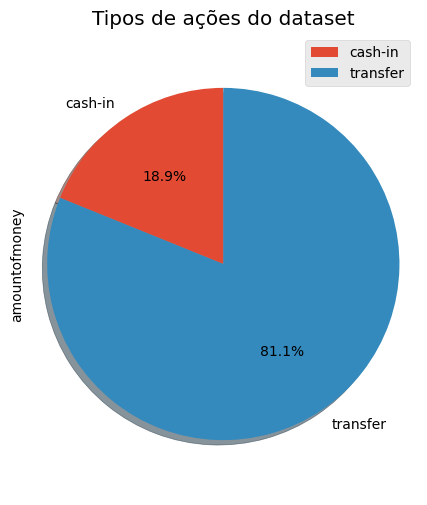

In [10]:
pie_aml.plot(kind='pie', figsize = (5,6), autopct = '%1.1f%%', startangle = 90, shadow= True )
plt.title('Tipos de ações do dataset')
plt.axis('equal')
plt.legend(labels=pie_aml.index, loc = 'upper right')
plt.show()

### Insights:
<ol>
    <li> A maior parte das movimentações feitas é via transferência: <strong>  81.1 % </strong> </li>
    <li>  Cash-in representa menos do que a metade do número de movimentos:<strong> 18.9% </strong> </li>
    
</ol>

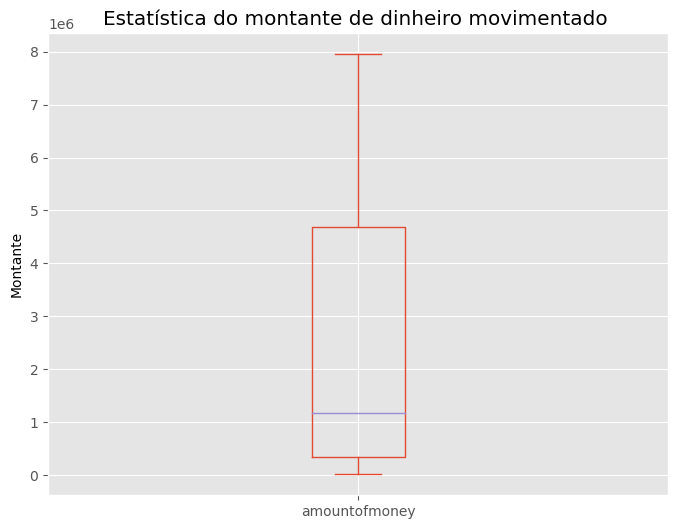

In [11]:
#Estatística do montante de dinheiro movimentado
df_amount = df[['amountofmoney']]

df_amount.plot(kind='box', figsize = (8,6))
plt.title('Estatística do montante de dinheiro movimentado ')
plt.ylabel('Montante')
plt.show()

In [12]:
df_amount.describe()

,amountofmoney
count,2.340000e+03
mean,2.508583e+06
std,2.560434e+06
min,1.333200e+04
25%,3.359140e+05
50%,1.162354e+06
75%,4.686559e+06
max,7.952497e+06


### Insights:
<ul>
<li>  Valor mínimo movimentado: <strong> 13.332 - Treze mil e trezentos e trinta e dois  </strong> </li>
<li>  Valor máximo movimentado: <strong>7.952.497 - Sete milhões, novecentos e cinquenta e dois mil e quartrocentos e noventa e sete </strong> </li>
<li>  Média dos valores movimentados: <strong>2.508.583 - Dois milhões, quinhentos e oito mil e quinhentos e oitenta e três </strong> </li>
</ul>

In [13]:
# Formatar montante em Axis Y para um melhor formato  

In [14]:
#Formatação da data 

_pordata = df.groupby('date',axis=0)['amountofmoney'].sum()
_df = pd.DataFrame(_pordata)
_df= _df.reset_index()
_df['date']= pd.to_datetime(_df['date'])
#_df['date'] = _df['date'].dt.date
_df['data'] = _df['date'].dt.date
_df['hora'] = _df['date'].dt.time
_df['mes'] = _df['date'].dt.month
_df['ano'] = _df['date'].dt.year
#_df['hora'] = _df['date'].dt.time

_df.head(25)

,date,amountofmoney,data,hora,mes,ano
0,2019-02-20 10:23:00,288350,2019-02-20,10:23:00,2,2019
1,2019-02-20 13:04:00,3217217,2019-02-20,13:04:00,2,2019
2,2019-02-20 13:29:00,328738,2019-02-20,13:29:00,2,2019
3,2019-02-20 14:09:00,3083463,2019-02-20,14:09:00,2,2019
4,2019-02-20 14:45:00,3316517,2019-02-20,14:45:00,2,2019
5,2019-02-21 08:15:00,6763814,2019-02-21,08:15:00,2,2019
6,2019-02-21 08:23:00,420045,2019-02-21,08:23:00,2,2019
7,2019-02-21 08:30:00,640046,2019-02-21,08:30:00,2,2019
8,2019-02-21 09:10:00,5505135,2019-02-21,09:10:00,2,2019
9,2019-02-21 09:35:00,328739,2019-02-21,09:35:00,2,2019


In [15]:
_df['ano'].unique()

array([2019], dtype=int64)

In [15]:
_df['mes'].unique()

array([2, 3, 4, 5, 6, 7], dtype=int64)

### Insights:
   <ul>
<li> Dataset contém apenas dados do ano:<strong> 2019 </strong> </li>
<li> Dataset contém dados dos meses: <strong> Fevereiro - 2  | Março - 3  | Abril - 4 | Maio - 5 | Junho - 6  | Julho - 7 </strong> </li>

</ul>

In [16]:
agrupar_por_mes = _df.groupby('mes')['amountofmoney'].sum()
agrupar_por_mes.head()



mes
2     333560075
3    1155236164
4    1136511154
5    1252791691
6    1205015249
Name: amountofmoney, dtype: int64

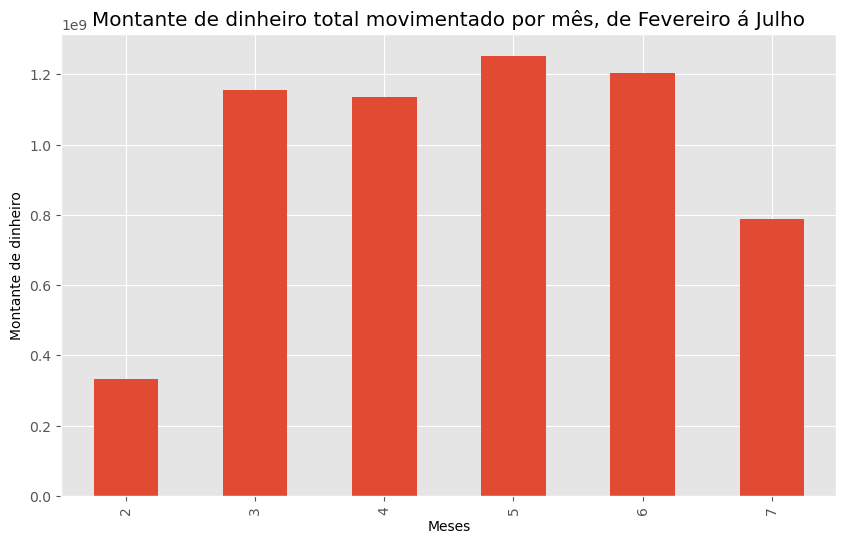

In [17]:
agrupar_por_mes.plot(kind='bar',figsize= (10,6))
plt.xlabel('Meses')
plt.ylabel('Montante de dinheiro')
plt.title('Montante de dinheiro total movimentado por mês, de Fevereiro á Julho')
plt.show()

### Insights:
 <ul>
<li> Mês com menos movimentação relativamente ao montante:<strong> Fevereiro: 333.560.075  </strong> </li>
<li> Mês com mais movimentações relativamente ao montante: <strong> Maio:  1.252.791.691 </strong> </li>

</ul>
    

In [18]:
#Verificar quantidade de contas origem

contas_source = df['sourceid'].unique()
contas_source.size
#contas_source

1749

In [19]:
#sns.countplot(x='sourceid', data=df)

In [20]:
df['sourceid'].value_counts()

4161     30
39284    29
96057    26
82688    26
92735    25
         ..
25847     1
55321     1
51984     1
45257     1
26390     1
Name: sourceid, Length: 1749, dtype: int64

In [21]:
#Verificar conta origem com mais movimentações
_conta = df.groupby('sourceid').size().reset_index(name='Quantidade de movimentos')
_conta['Quantidade de movimentos'].max()



30

In [22]:
__conta = _conta[_conta['Quantidade de movimentos'] == 30 ]
__conta

,sourceid,Quantidade de movimentos
85,4161,30


In [23]:
__df = df[df['sourceid']==4161]
__df

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
79,cash-in,4161,7806,249081,2019-06-15 12:36:00,1,type1
80,cash-in,4161,93672,249081,2019-03-14 12:30:00,1,type1
81,cash-in,4161,75260,249081,2019-03-28 09:03:00,1,type1
82,cash-in,4161,52002,249081,2019-03-21 11:11:00,1,type1
83,cash-in,4161,50023,249081,2019-06-04 08:29:00,1,type1
84,cash-in,4161,7038,249081,2019-06-16 10:10:00,1,type1
85,cash-in,4161,32828,249081,2019-05-23 12:40:00,1,type1
86,cash-in,4161,99617,249081,2019-05-15 08:27:00,1,type1
87,cash-in,4161,34858,249081,2019-06-19 09:13:00,1,type1
88,cash-in,4161,28744,249081,2019-02-21 12:14:00,1,type1


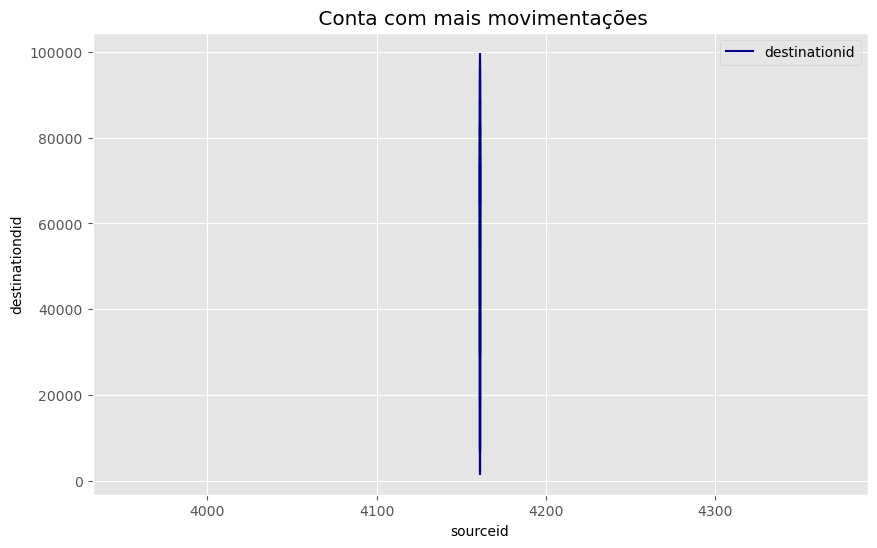

In [24]:
__df.plot(kind='line', x='sourceid', y='destinationid', figsize=(10, 6), color='darkblue')

plt.title(' Conta com mais movimentações')
plt.xlabel('sourceid')
plt.ylabel('destinationdid')

plt.show()

In [25]:
#Qual ação é mais frequente na conta com mais movimentações?
# Se tem fraude, qual fraude ela mais comete?
# Estatística do montante movido nessa conta ?
# Fazer comparação entre quantidade máxima de movimentos de uma certa conta com a quantidade média de movimentos 
# Verificar comportamento de uma conta com uma quantidade média de movimentos e as contas dos respectivos de
#com a máxima quantidade de movimentos 


In [26]:
#Verificar conta origem com menos movimentações

In [27]:
#Verificar quantidade de contas destino

contas_destination = df['destinationid'].unique()
contas_destination.size

1710

In [28]:
#Verificar conta destino com mais movimentações


In [29]:
#Verificar conta destino com menos movimentações

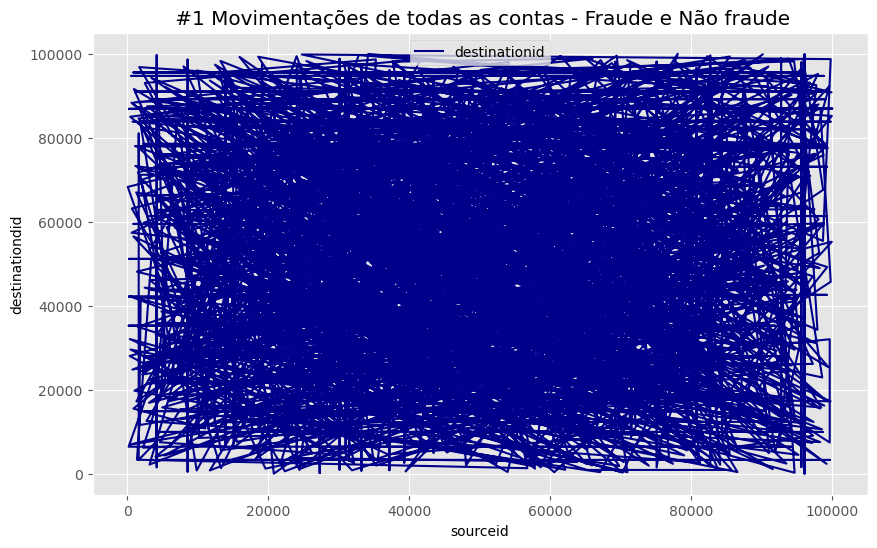

In [31]:
#Gráfico de linha que representa todas os movimentos, Fraude e não fraude em conjunto

df.plot(kind='line', x='sourceid', y='destinationid', figsize=(10, 6), color='darkblue')

plt.title(' #1 Movimentações de todas as contas - Fraude e Não fraude')
plt.xlabel('sourceid')
plt.ylabel('destinationdid')

plt.show()

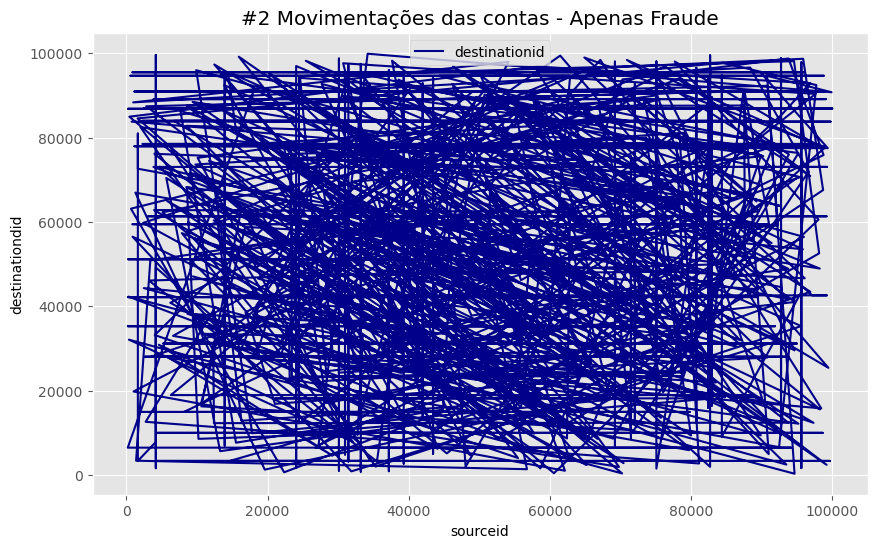

In [32]:
#gráfico de movimentações que são fraude

movimentacoes_fraude = df[df["isfraud"]==1]
movimentacoes_fraude.plot(kind='line', x='sourceid', y='destinationid', figsize=(10, 6), color='darkblue')

plt.title('#2 Movimentações das contas - Apenas Fraude')
plt.xlabel('sourceid')
plt.ylabel('destinationdid')

plt.show()


In [33]:
movimentacoes_fraude.size

9793

### Insights:
 <ul>
    <li>Concernente ao gráfico das movimentações das contas acima, é possível verificar que a grelha no gráfico #1  de <strong>Fraude e não fraude, </strong> apresenta <strong> mais densidade</strong> em relação ao gráfico #2 de <strong> Apenas Fraude </strong>, mas no entanto apresenta as mesmas dimensões de largura e altura. </li>


</ul>
    

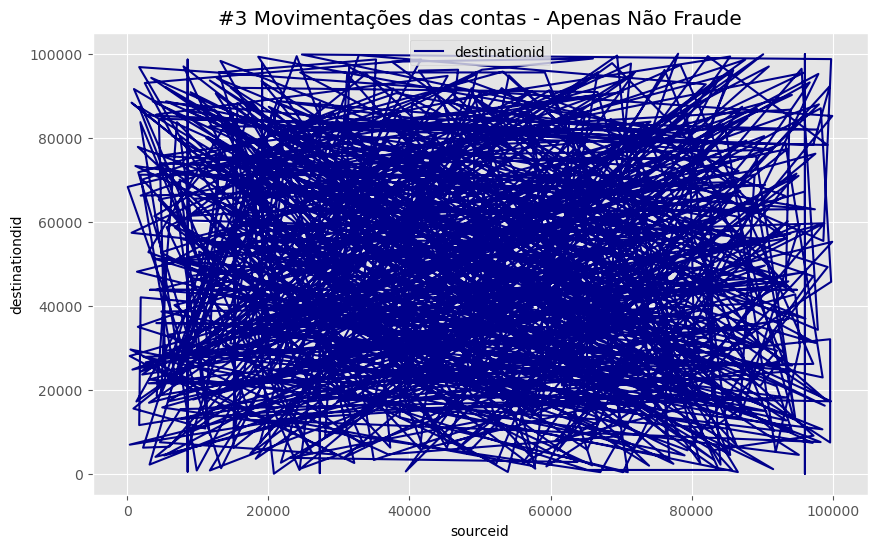

In [34]:
#Gráfico de movimentações que não são fraude 
movimentacoes_nao_fraude = df[df["isfraud"]==0] 
movimentacoes_nao_fraude.plot(kind='line', x='sourceid', y='destinationid', figsize=(10, 6), color='darkblue')

plt.title('#3 Movimentações das contas - Apenas Não Fraude')
plt.xlabel('sourceid')
plt.ylabel('destinationdid')

plt.show()
#movimentacoes_nao_fraude.head()

### Insights:
 <ul> 
    <li> É possível verificar que as contas que não cometem fraude não apresentam um certo padrão gráfico de comportamento </li>
    <li>É muito díficil verificar uma certa diferença entre os gráficos de número #2 e #3, ou seja de Fraude e não fraude, logo iremos efetuar mais comparações abaixo entre os gráficos de não fraude com os gráficos dos respectivos tipos de fraude.  </li>
</ul>
    

<h3> 2.Tratamento do 1º tipo de Fraude: Money Placement </h3>
<p> Money placement é uma técnica utilizada em atividades de branqueamento de capitais que consiste em <strong>colocar dinheiro ilícito diretamente em instituições financeiras.</strong> Isso pode ser feito através da abertura de contas bancárias em nome de pessoas físicas ou jurídicas fictícias, ou através do<strong> depósito de grandes quantias de dinheiro em contas já existentes.</strong>

In [35]:
#Seleção de linhas do DataSET cujo tipo de fraude seja de Money Placement (type1)

fraud_type1= df[df["typeoffraud"]=="type1"]

In [36]:
fraud_type1.head(25)

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,cash-in,30105,28942,494528,2019-07-19 14:40:00,1,type1
1,cash-in,30105,8692,494528,2019-05-17 14:57:00,1,type1
2,cash-in,30105,60094,494528,2019-07-20 13:20:00,1,type1
3,cash-in,30105,20575,494528,2019-07-03 14:15:00,1,type1
4,cash-in,30105,45938,494528,2019-05-26 10:40:00,1,type1
5,cash-in,30105,54971,494528,2019-04-06 11:18:00,1,type1
6,cash-in,30105,62257,494528,2019-04-23 08:20:00,1,type1
7,cash-in,30105,1020,494528,2019-07-04 08:59:00,1,type1
8,cash-in,30105,98751,494528,2019-05-06 12:49:00,1,type1
9,cash-in,30105,82016,494528,2019-06-09 12:27:00,1,type1


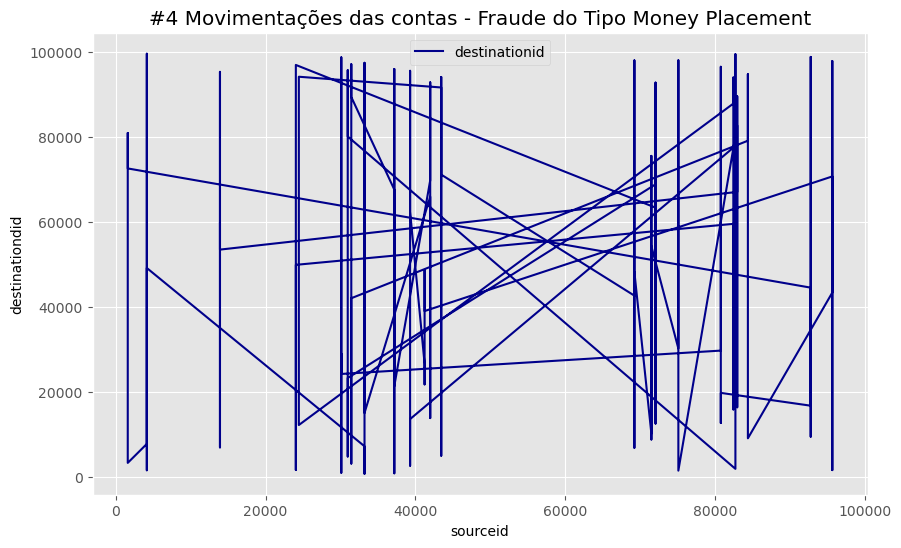

In [37]:
fraud_type1.plot(kind='line', x='sourceid', y='destinationid', figsize=(10, 6), color='darkblue')

plt.title('#4 Movimentações das contas - Fraude do Tipo Money Placement')
plt.xlabel('sourceid')
plt.ylabel('destinationdid')

plt.show()

### Insights:
 <ul>
   <li> Comparando o gráfico acima #4 com o gráfico não fraude #3 é possível verificar que as movimentações das contas 
    que cometem fraude do tipo money placement apresentam um certo comportamento gráfico diferente, ou seja: 
    a maior parte das movimentações do tipo fraude Money Placement apresentam um comportamento gráfico <strong> VERTICAL </strong> em  relçao aos outros tipos de movimentações.
    </li>
</ul>
    

In [38]:
#Agrupamento com base a fonte(sourceid), destino(destinationid), e quantidade de dinheiro(amountofmoney)

df_source_based = fraud_type1.groupby(["sourceid","destinationid"])["amountofmoney"].agg([np.min, np.max, np.sum, np.mean])

In [39]:
print(df_source_based.head(100))

                          amin    amax     sum      mean
sourceid destinationid                                  
1615     3335           639230  639230  639230  639230.0
         6054           639230  639230  639230  639230.0
         6322           639229  639229  639229  639229.0
         7203           639230  639230  639230  639230.0
         8552           639230  639230  639230  639230.0
...                        ...     ...     ...       ...
30105    8692           494528  494528  494528  494528.0
         12860          494529  494529  494529  494529.0
         13800          494528  494528  494528  494528.0
         20575          494528  494528  494528  494528.0
         23762          494529  494529  494529  494529.0

[100 rows x 4 columns]


In [40]:
# Verificação dos movimentos da conta nº 30105

_account = fraud_type1[fraud_type1["sourceid"]== 30105]

In [41]:
grouped_account = _account.groupby(["sourceid","destinationid"])["amountofmoney"].sum()
print(grouped_account)

sourceid  destinationid
30105     1020             494528
          3164             494529
          8692             494528
          12860            494529
          13800            494528
          20575            494528
          23762            494529
          24259            494529
          28942            494528
          45938            494528
          52681            494529
          54971            494528
          60094            494528
          61008            494529
          62257            494528
          64316            494529
          80113            494529
          82016            494528
          94472            494529
          98751            494528
Name: amountofmoney, dtype: int64


<p> Aqui podemos verificar que a fonte de nº:<strong> 30105 </strong> efetua vários dépositos com a mesma quantia em várias contas diferentes - Uma característica de Money Placement. </p>

<h3>3.Tratamento do 2º tipo de Fraude: Money Layering </h3>
<p>Money layering, ou camadas de dinheiro em português, é uma técnica utilizada em atividades de branqueamento de capitais para dificultar a identificação da origem dos recursos ilícitos. Essa técnica consiste em<strong> movimentar o dinheiro através de várias transações financeiras complexas</strong> e em diferentes jurisdições, a fim de obscurecer a trilha de onde o dinheiro veio. </p>

In [42]:
fraud_type2= df[df["typeoffraud"]=="type2"]

In [43]:
fraud_type2.head()

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
423,transfer,42454,32893,7270189,2019-02-25 11:50:00,1,type2
424,transfer,32893,30530,7270189,2019-03-12 11:43:00,1,type2
425,transfer,30530,36647,7270189,2019-03-17 10:25:00,1,type2
426,transfer,36647,64269,7270189,2019-05-29 10:06:00,1,type2
427,transfer,64269,48051,7270189,2019-05-31 09:00:00,1,type2


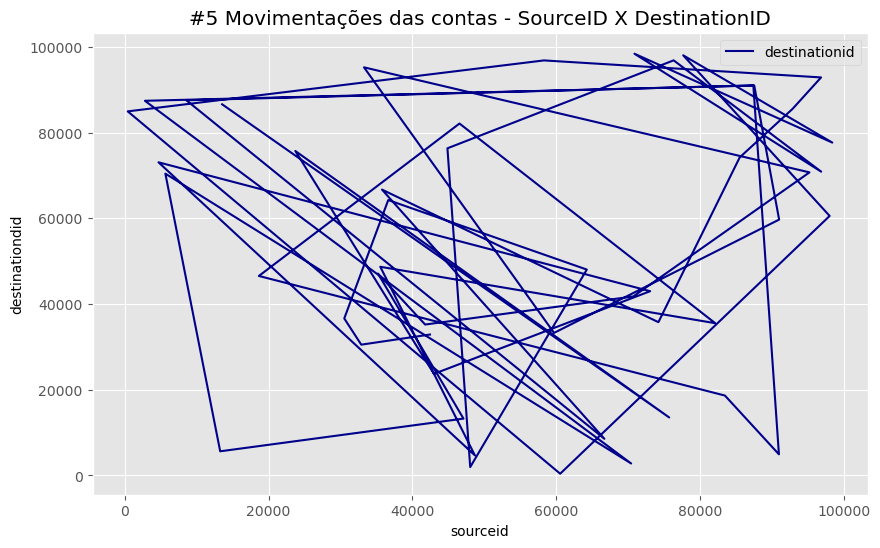

In [44]:
_fraud_type2 = fraud_type2.head(50)
_fraud_type2.plot(kind='line', x='sourceid', y='destinationid', figsize=(10, 6), color='darkblue')

plt.title('#5 Movimentações das contas - SourceID X DestinationID')
plt.xlabel('sourceid')
plt.ylabel('destinationdid')

plt.show()

### Insights:
 <ul>
   <li> Comparando o gráfico acima #5 com o gráfico não fraude #3 é possível verificar que as movimentações das contas 
    que cometem fraude do tipo money layering apresentam um certo comportamento gráfico diferente, ou seja: 
    a maior parte das movimentações do tipo fraude Money layering apresentam um comportamento gráfico <strong> OBLÍQUO </strong> em  relçao aos outros tipos de movimentações.
    </li>
</ul>
    

<h3>4.Tratamento do 3º Tipo de fraude: Money Integration</h3>
<p>

In [45]:
fraud_type3= df[df["typeoffraud"]=="type3"]

In [46]:
fraud_type3.tail(20)

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
1379,transfer,73912,95498,281506,2019-05-06 15:32:00,1,type3
1380,transfer,65179,95498,281506,2019-02-21 09:47:00,1,type3
1381,transfer,14146,95498,281506,2019-03-11 14:09:00,1,type3
1382,transfer,14092,95498,281506,2019-04-05 12:20:00,1,type3
1383,transfer,862,95498,281506,2019-07-18 09:11:00,1,type3
1384,transfer,28267,95498,281506,2019-04-06 10:56:00,1,type3
1385,transfer,51514,95498,281506,2019-05-31 14:09:00,1,type3
1386,transfer,14126,95498,281506,2019-06-13 09:11:00,1,type3
1387,transfer,53999,95498,281506,2019-03-18 15:11:00,1,type3
1388,transfer,95231,95498,281506,2019-06-11 14:47:00,1,type3


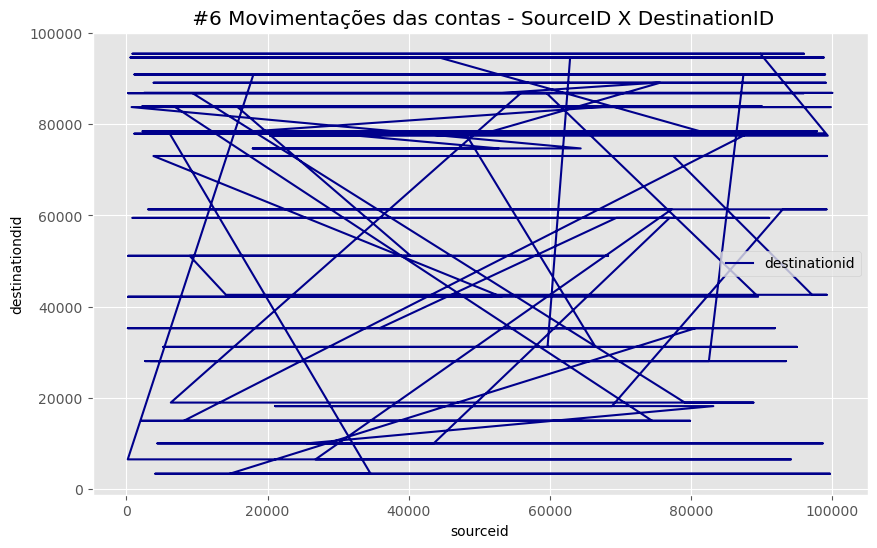

In [47]:
fraud_type3.plot(kind='line', x='sourceid', y='destinationid', figsize=(10, 6), color='darkblue')

plt.title(' #6 Movimentações das contas - SourceID X DestinationID')
plt.xlabel('sourceid')
plt.ylabel('destinationdid')

plt.show()

### Insights:
 <ul>
   <li> Comparando o gráfico acima #6 com o gráfico não fraude #3 é possível verificar que as movimentações das contas 
    que cometem fraude do tipo money integration apresentam um certo comportamento gráfico diferente, ou seja: 
    a maior parte das movimentações do tipo fraude Money integration apresentam um comportamento gráfico <strong> HORIZONTAL </strong> em  relçao aos outros tipos de movimentações.
    </li>
</ul>

<h3> 2. Desenvolvimento do Modelo </h3>

Após a análise feita acima, é possível identificar as variáveis mais importantes do conjunto de dados relevantes para a construção do modelo para detecção de branqueamento de capitais. Essas variáveis são:<br>
1. sourceid <br>
2. destinatioid<br>
3. amountofmoney

In [52]:
#Importação da biblioteca necessária para a construção do modelo
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Para usar o Sci-kit learn, é necessário converter o dataframe em pandas para um array numpy


In [53]:
X = df[['sourceid','destinationid','amountofmoney']].values
X[0:5]

array([[ 30105,  28942, 494528],
       [ 30105,   8692, 494528],
       [ 30105,  60094, 494528],
       [ 30105,  20575, 494528],
       [ 30105,  45938, 494528]], dtype=int64)

In [54]:
y = df['isfraud'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

### Normalização dos Dados
A Padronização de Dados confere aos dados média zero e variância unitária, sendo uma prática recomendada, especialmente para algoritmos como o KNN, que se baseia na distância entre os pontos de dados.

In [55]:
X_train_norm = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_train_norm[0:5]

NameError: name 'X_train' is not defined

In [51]:
X_test_norm = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
X_test_norm[0:5]

NameError: name 'preprocessing' is not defined

<h3>K nearest neighbor (KNN)</h3>


O "K" em KNN é o número de vizinhos mais próximos a examinar. Ele deve ser especificado pelo usuário. Então, como podemos escolher o valor correto para o K?
A solução geral é reservar uma parte dos seus dados para testar a precisão do modelo. Em seguida, escolha k = 1, use a parte de treinamento para modelagem e calcule a precisão da previsão usando todas as amostras no conjunto de teste. Repita esse processo, aumentando o k, e veja qual k é o melhor para o seu modelo.

Podemos calcular a precisão do KNN para diferentes valores de k

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [65]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_norm,y_train)
    yhat=neigh.predict(X_test_norm)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.80769231, 0.76709402, 0.83119658, 0.81196581, 0.83333333,
       0.82905983, 0.83760684, 0.83333333, 0.82478632])

### Gráfico da precisão do modelo para diferentes números de vizinhos.

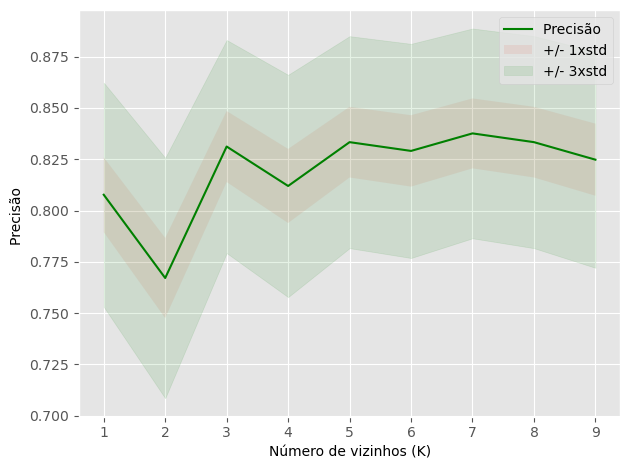

In [66]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Precisão ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Precisão ')
plt.xlabel('Número de vizinhos (K)')
plt.tight_layout()
plt.show()

In [67]:
print( "A melhor precisão é de", mean_acc.max(), "com o valor de k=", mean_acc.argmax()+1) 

A melhor precisão é de 0.8376068376068376 com o valor de k= 7


### Validação Cruzada

### Matriz Confusão

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#print(confusion_matrix(y_test, yhat, labels=[1,0]))

A primeira linha é para os clientes cujo valor real de fraude no conjunto de testes é 1.
Como você pode calcular, dos 1872 clientes, o valor de fraude de 759 deles é 1.

Desses 759 casos, o classificador previu corretamente 621 deles como 1 e 138 deles como 0.

Isso significa que, para 621 clientes, o valor real de cancelamento era 1 no conjunto de testes e o classificador também previu corretamente esses como 1. No entanto, enquanto o rótulo real de 138 clientes era 1, o classificador os previu como 0, o que não é muito bom. Podemos considerar isso como o erro do modelo para a primeira linha.

E quanto aos clientes com valor de fraude 0? Vamos olhar para a segunda linha.
Parece que havia 1113 clientes cujo valor de cancelamento era 0.
O classificador previu corretamente 1063 deles como 0 e 50 deles erroneamente como 1. Portanto, ele fez um bom trabalho em prever os clientes com valor de cancelamento 0. 

Uma coisa boa sobre a matriz de confusão é que ela mostra a capacidade do modelo de prever corretamente ou separar as classes. Em um caso específico do classificador binário, como neste exemplo, podemos interpretar esses números como a contagem de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.

In [123]:
#print (classification_report(y_train,predicted_labels))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87       759
           1       0.89      0.96      0.92      1113

    accuracy                           0.90      1872
   macro avg       0.91      0.89      0.89      1872
weighted avg       0.90      0.90      0.90      1872



In [33]:
# Defina o número de dobras para a validação cruzada
from sklearn.model_selection import KFold
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Inicialize a matriz de confusão
confusion = np.zeros((2, 2))

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    knn_model.fit(X_train, y_train)
    predicted_labels = knn_model.predict(X_test)

    confusion_fold = confusion_matrix(y_test, predicted_labels)
    confusion += confusion_fold

# Imprima a matriz de confusão resultante da validação cruzada
print("Confusion Matrix:\n", confusion)


NameError: name 'knn_model' is not defined